In [27]:
import json
import pandas as pd
import mord
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [15]:
# Load data from files
with open('../data/all_windows_classified.json', 'r') as f:
    sentiment_data = json.load(f)

with open('../data/bill_window_matching.json', 'r') as f:
    bill_windows = json.load(f)

with open('../data/bill_data.json', 'r') as f:
    bill_data = json.load(f)

/Users/School/miniforge3/envs/climate-policy/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


Mean Absolute Error: 3.5869565217391304


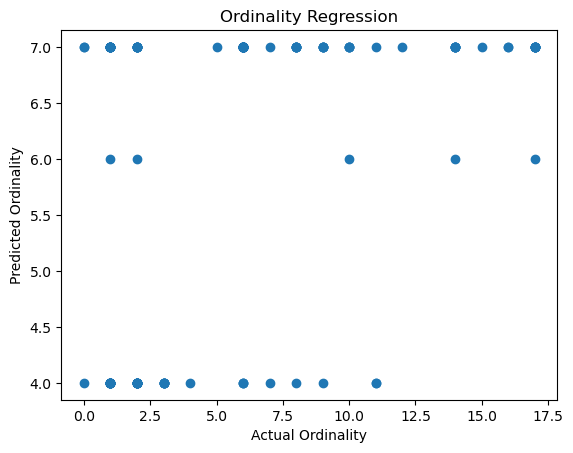

In [28]:
# Aggregate sentiment scores for each bill
bill_sentiment_data = {}
for bill_key in bill_windows:
    ordinality = bill_data[bill_key]['last_action_ordinal']

    bill_sentiment_data[bill_key] = {'positive': [], 'negative': [], 'neutral': [], 'ordinality': ordinality}

    for window_key in bill_windows[bill_key]:
        for sentiment_type in ['positive', 'negative', 'neutral']:
            bill_sentiment_data[bill_key][sentiment_type].append(sentiment_data[window_key]['sentiment'][sentiment_type])

    # Calculate average sentiment score for each sentiment type
    for sentiment_type in ['positive', 'negative', 'neutral']:
        if len(bill_sentiment_data[bill_key][sentiment_type]) > 0:
            bill_sentiment_data[bill_key][sentiment_type] = sum(bill_sentiment_data[bill_key][sentiment_type]) / len(bill_sentiment_data[bill_key][sentiment_type])
        else:
            bill_sentiment_data[bill_key][sentiment_type] = 0.0

    # # Convert ordinality to binary
    # if ordinality > threshold:
    #     bill_sentiment_data[bill_key]['binary'] = 1
    # else:
    #     bill_sentiment_data[bill_key]['binary'] = 0

# Create dataframe for regression
df = pd.DataFrame.from_dict(bill_sentiment_data, orient='index')
X = df[['positive', 'negative', 'neutral']]
y = df['ordinality']

# Fit logistic regression
# reg = LogisticRegression().fit(X, y)
#
# # Print regression coefficients
# print('Positive coefficient:', reg.coef_[0][0])
# print('Negative coefficient:', reg.coef_[0][1])
# print('Neutral coefficient:', reg.coef_[0][2])

# Create an instance of the OrdinalRidge model from the mord library
model = mord.OrdinalRidge()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate model performance (optional)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', mae)

# Plot predicted vs actual ordinality values
plt.scatter(y, predictions)
plt.xlabel('Actual Ordinality')
plt.ylabel('Predicted Ordinality')
plt.title('Ordinality Regression')
plt.show()